<a href="https://colab.research.google.com/gist/cavidqlyv/b0ccc6c63f9ac6efc9ce7aa6da4db4eb/explainability_dla_javid_guliyev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [1]:
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
from keras import activations
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pandas as pd
import random

# 1 Loading and observing data

## 1.0 Loading dataset 

In [2]:
!wget -nc https://raw.githubusercontent.com/cauchyturing/UCR_Time_Series_Classification_Deep_Learning_Baseline/master/Adiac/Adiac_TRAIN
!wget -nc https://raw.githubusercontent.com/cauchyturing/UCR_Time_Series_Classification_Deep_Learning_Baseline/master/Adiac/Adiac_TEST

--2021-12-16 00:17:50--  https://raw.githubusercontent.com/cauchyturing/UCR_Time_Series_Classification_Deep_Learning_Baseline/master/Adiac/Adiac_TRAIN
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 552319 (539K) [text/plain]
Saving to: ‘Adiac_TRAIN’

Adiac_TRAIN         100%[===================>] 539.37K  --.-KB/s    in 0.04s   

2021-12-16 00:17:51 (13.1 MB/s) - ‘Adiac_TRAIN’ saved [552319/552319]

--2021-12-16 00:17:51--  https://raw.githubusercontent.com/cauchyturing/UCR_Time_Series_Classification_Deep_Learning_Baseline/master/Adiac/Adiac_TEST
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... 

In [3]:
Adiac_TEST = pd.read_csv("Adiac_TEST",header=None)
Adiac_TRAIN = pd.read_csv("Adiac_TRAIN",header=None)

In [4]:
Adiac_TRAIN.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176
0,22,1.5980,1.5994,1.5705,1.5505,1.5074,1.4343,1.3690,1.3053,1.2103,1.11670,1.02400,0.92598,0.82811,0.73922,0.64305,0.55643,0.46295,0.36958,0.278430,0.185830,0.095532,0.010646,-0.080856,-0.165550,-0.24349,-0.33543,-0.42611,-0.49749,-0.56685,-0.64986,-0.73225,-0.77780,-0.84298,-0.91730,-0.98797,-1.0550,-1.0968,-1.1471,-1.1984,...,-1.2314,-1.1973,-1.1563,-1.1105,-1.0845,-1.0258,-0.96255,-0.89507,-0.84781,-0.77254,-0.69457,-0.63200,-0.55122,-0.48459,-0.40868,-0.32442,-0.24745,-0.163650,-0.076913,0.008801,0.097274,0.18590,0.28400,0.38121,0.46303,0.55693,0.65097,0.73820,0.83474,0.92994,1.02490,1.1209,1.2172,1.3125,1.4029,1.4810,1.5210,1.5642,1.5709,1.5929
1,28,1.7011,1.6706,1.6189,1.5468,1.4755,1.3912,1.3059,1.2373,1.1534,1.06970,0.98454,0.89942,0.81613,0.73289,0.65765,0.58059,0.49598,0.41346,0.328920,0.247070,0.162800,0.081586,-0.002312,-0.086058,-0.16615,-0.24934,-0.33229,-0.41343,-0.49281,-0.57445,-0.65558,-0.73608,-0.81585,-0.87417,-0.95156,-1.0304,-1.1066,-1.1605,-1.2295,...,-1.3865,-1.3337,-1.2741,-1.2091,-1.1403,-1.0685,-1.01540,-0.93923,-0.86161,-0.78286,-0.70322,-0.62788,-0.54657,-0.48110,-0.40169,-0.31898,-0.23813,-0.156220,-0.072617,0.011155,0.092161,0.17633,0.25802,0.34250,0.42475,0.50945,0.59393,0.67535,0.76012,0.84345,0.92855,1.0122,1.0974,1.1826,1.2663,1.3506,1.4352,1.5197,1.6025,1.6702
2,21,1.7223,1.6953,1.6569,1.6063,1.5118,1.4141,1.3137,1.2132,1.1130,1.01510,0.92044,0.82783,0.74045,0.65784,0.58566,0.50090,0.41719,0.33458,0.248210,0.163890,0.079398,-0.007460,-0.088978,-0.179400,-0.26032,-0.34648,-0.42356,-0.50636,-0.57124,-0.65419,-0.71821,-0.79647,-0.86811,-0.93526,-0.98426,-1.0498,-1.0994,-1.1553,-1.1928,...,-1.3201,-1.2776,-1.2402,-1.1844,-1.1433,-1.0778,-1.00810,-0.94463,-0.86823,-0.79717,-0.71640,-0.64076,-0.55555,-0.48841,-0.40269,-0.31787,-0.24673,-0.160120,-0.069468,0.017895,0.101430,0.19090,0.27608,0.36405,0.45174,0.53393,0.61327,0.69933,0.78336,0.87571,0.96917,1.0656,1.1648,1.2639,1.3643,1.4635,1.5473,1.6418,1.6950,1.7085
3,15,1.7263,1.6598,1.5731,1.4963,1.4091,1.3324,1.2457,1.1589,1.0734,0.98716,0.90085,0.81538,0.73021,0.64413,0.55821,0.48401,0.39967,0.32502,0.240120,0.155500,0.071187,-0.012764,-0.095129,-0.179400,-0.26197,-0.34394,-0.42521,-0.50568,-0.58521,-0.66519,-0.74481,-0.82070,-0.89474,-0.97170,-1.04130,-1.1136,-1.1686,-1.2341,-1.2871,...,-1.3236,-1.2689,-1.2155,-1.1498,-1.0804,-1.0138,-0.93885,-0.86354,-0.78830,-0.70858,-0.63175,-0.55361,-0.47101,-0.39104,-0.31023,-0.22870,-0.14647,-0.062045,0.021644,0.105120,0.188980,0.27319,0.35770,0.44249,0.52753,0.60636,0.68682,0.77244,0.85833,0.94321,1.02840,1.1144,1.1996,1.2754,1.3623,1.4486,1.5351,1.6222,1.7078,1.7390
4,2,1.7790,1.7612,1.7031,1.6106,1.4921,1.3687,1.2448,1.1209,1.0108,0.90017,0.78577,0.67866,0.57965,0.50175,0.41544,0.33271,0.27374,0.18654,0.096384,0.008932,-0.074871,-0.154730,-0.230340,-0.307650,-0.39814,-0.48677,-0.52267,-0.59381,-0.66719,-0.72515,-0.77890,-0.84122,-0.89845,-0.95026,-0.99949,-1.0361,-1.0754,-1.1160,-1.1562,...,-1.2452,-1.2049,-1.1775,-1.1061,-1.0754,-1.0298,-0.96087,-0.91780,-0.83978,-0.78567,-0.71439,-0.64502,-0.56657,-0.49789,-0.40452,-0.32762,-0.24394,-0.160770,-0.075812,0.014266,0.107010,0.19353,0.27630,0.36152,0.45169,0.54150,0.63435,0.72239,0.82215,0.92892,1.04480,1.1657,1.2857,1.4089,1.5080,1.6236,1.7136,1.7664,1.7836,1.7586


## 1.1 Seperating Data

In [5]:
X_train,Y_train=Adiac_TRAIN.iloc[:,1:],Adiac_TRAIN.iloc[:,0]

X_test,Y_test=Adiac_TEST.iloc[:,1:],Adiac_TEST.iloc[:,0]

In [6]:
print(X_train.shape,Y_train.shape)

print(X_test.shape,Y_test.shape)

(390, 176) (390,)
(391, 176) (391,)


## 1.2 Plots For Visualizatioon

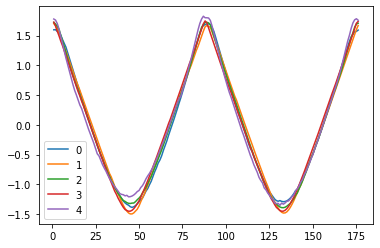

In [7]:
X_train.iloc[0:5].T.plot()
plt.show()

In [ ]:
Plot_x_train = X_train.iloc[0:5].T

## 1.3 The total number of classes

In [8]:
uniqueClass = pd.concat([Y_test,Y_train],axis=0).unique()
uniqueClass

array([16, 36, 34, 22, 31, 24,  2, 30, 14, 25, 18, 32, 28, 26, 37, 10, 21,
        3, 29,  5, 12, 20, 35,  7, 11,  8,  6, 15, 13, 27, 17, 23,  4, 19,
        1,  9, 33])

In [ ]:
len(uniqueClass)

## 1.4 Processing

Transforming labels

In [10]:
def transform_labels(y_train,y_test):
  """
  This function transforms non-binary classes to a binary representation
  For example if we have a list of 6 flowers each can have one of the 3 classes
  Input: [
           1, 
           3,
           3,
           2,
           1,
           2
          ]
           
  Output: [
           [1,0,0], # class 1 
           [0,0,1], # class 3
           [0,0,1], # class 3
           [0,1,0], # class 2
           [1,0,0], # class 1
           [0,1,0]  # class 2
          ]
  """
  
  print('y_train',y_train.shape) 
  print('y_test',y_test.shape) 
  
  # concatenate train and test sets 
  y_train_test = np.concatenate((y_train,y_test),axis =0)
  
  # initialize a Label encoder 
  encoder = LabelEncoder()
  # transform [1,3,3,2,1,2] to [0,2,2,1,0,1] 
  new_y_train_test = encoder.fit_transform(y_train_test)
  
  # initialize a one-hot encoder
  encoder = OneHotEncoder()
  # transform from [0,2,2,1,0,1] to binary representation
  new_y_train_test = encoder.fit_transform(new_y_train_test.reshape(-1,1))
  
  # split train/test sets
  new_y_train = new_y_train_test[0:len(y_train)]
  new_y_test = new_y_train_test[len(y_train):]
  
  print('new_y_train',new_y_train.shape) 
  print('new_y_test',new_y_test.shape) 
  
  # return sets in numpy array format
  return new_y_train.toarray(), new_y_test.toarray()   

Transform classes into binary representation (one-hot encoding)

In [11]:
y_train,y_test = transform_labels(Y_train,Y_test)

y_train (390,)
y_test (391,)
new_y_train (390, 37)
new_y_test (391, 37)


In [12]:
X_train = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

# 2 Convolutional Neural Network for time series

In [13]:
keras.backend.clear_session()

# input layer
input_layer = keras .layers.Input(X_train.shape[1:])

# convolution layer
conv_1 = keras.layers.Conv1D(filters=128, kernel_size=(8),padding='same')(input_layer)
norm1 = keras.layers.BatchNormalization()(conv_1)
activ_layer1 = keras.layers.Activation(activations.relu)(norm1)

# convolution layer
conv_2 = keras.layers.Conv1D(filters=256, kernel_size=(5),padding='same')(activ_layer1)
norm2 = keras.layers.BatchNormalization()(conv_2)
activ_layer2 = keras.layers.Activation(activations.relu)(norm2)


# convolution layer
conv_3 = keras.layers.Conv1D(filters=128, kernel_size=(3),padding='same')(activ_layer2) 
norm3 = keras.layers.BatchNormalization()(conv_3)
activ_layer3 = keras.layers.Activation(activations.relu)(norm3)



# Global average pooling
gap = keras.layers.GlobalAveragePooling1D()(activ_layer3)

# number of classes
nb_classes = y_train.shape[1]

# output 
output_layer = keras.layers.Dense(units=nb_classes,activation='softmax')(gap)


# build module
model = keras.models.Model(inputs=input_layer,outputs=output_layer)

# display model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 176, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 176, 128)          1152      
                                                                 
 batch_normalization (BatchN  (None, 176, 128)         512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 176, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 176, 256)          164096    
                                                                 
 batch_normalization_1 (Batc  (None, 176, 256)         1024      
 hNormalization)                                             

Callbacks & optimization algorithm

In [14]:
#  Callbacks ReduceLROnPlateau
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=50,min_lr=0.0001)

# choose cost function 
cost_function = keras.losses.categorical_crossentropy 

# choose optimization algorithm
optimizer_algo = keras.optimizers.Adam()

# compile model 
model.compile(loss=cost_function,optimizer=optimizer_algo, metrics=['accuracy'])

# 3 Training and evaluation

## 6- Train your model on the training set for 2000 epochs with a batch size of 256


In [15]:
mini_batch_size = 256
nb_epochs = 2000
percentage_of_train_as_validation = 0.3

history = model.fit(X_train,y_train, batch_size=mini_batch_size, validation_split=percentage_of_train_as_validation ,epochs=nb_epochs,callbacks=[reduce_lr])

Epoch 1/2000
2/2 [==============================] - 17s 2s/step - loss: 3.6882 - accuracy: 0.0330 - val_loss: 3.6129 - val_accuracy: 0.0342 - lr: 0.0010
Epoch 2/2000
2/2 [==============================] - 0s 162ms/step - loss: 3.6226 - accuracy: 0.0330 - val_loss: 3.6123 - val_accuracy: 0.0427 - lr: 0.0010
Epoch 3/2000
2/2 [==============================] - 0s 125ms/step - loss: 3.5971 - accuracy: 0.0586 - val_loss: 3.6099 - val_accuracy: 0.0085 - lr: 0.0010
Epoch 4/2000
2/2 [==============================] - 0s 127ms/step - loss: 3.5817 - accuracy: 0.0330 - val_loss: 3.6076 - val_accuracy: 0.0342 - lr: 0.0010
Epoch 5/2000
2/2 [==============================] - 0s 197ms/step - loss: 3.5627 - accuracy: 0.0330 - val_loss: 3.6056 - val_accuracy: 0.0171 - lr: 0.0010
Epoch 6/2000
2/2 [==============================] - 0s 171ms/step - loss: 3.5402 - accuracy: 0.0440 - val_loss: 3.6067 - val_accuracy: 0.0171 - lr: 0.0010
Epoch 7/2000
2/2 [==============================] - 0s 142ms/step - loss

## 7- Evaluate your model on the test set

In [16]:
loss,acc = model.evaluate(X_test,y_test,verbose=False)

print("Accuracy on the test set is:",acc)

print("Loss on the test set is:",loss)

Accuracy on the test set is: 0.6598465442657471
Loss on the test set is: 1.2042278051376343


## 8- Plot the train and test curves (accuracy and loss)


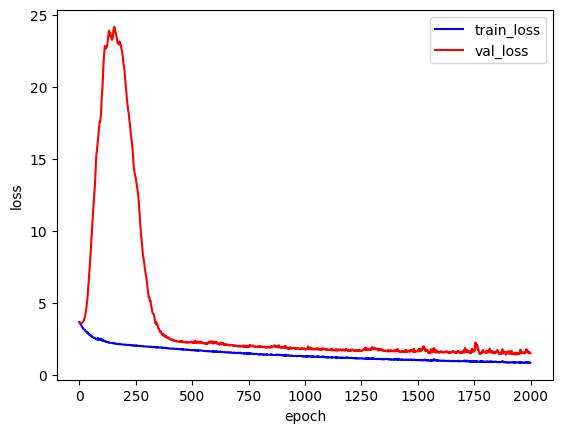

In [17]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

history_dict = history.history
loss_train_epochs = history_dict['loss']
loss_val_epochs = history_dict['val_loss']

plt.figure()
plt.plot(loss_train_epochs,color='blue',label='train_loss')
plt.plot(loss_val_epochs,color='red',label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('epoch-loss.pdf')
plt.show()
plt.close()

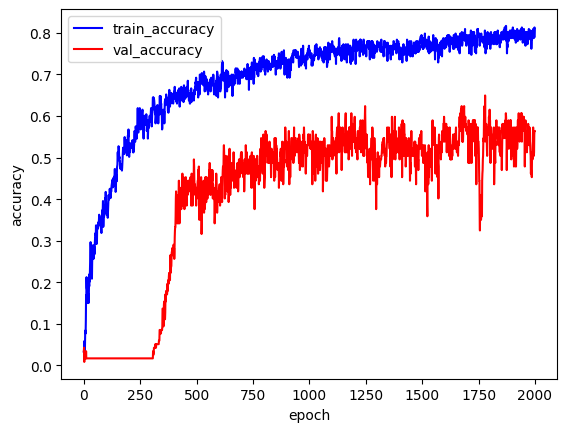

In [18]:
history_dict = history.history
loss_train_epochs = history_dict['accuracy']
loss_val_epochs = history_dict['val_accuracy']

plt.figure()
plt.plot(loss_train_epochs,color='blue',label='train_accuracy')
plt.plot(loss_val_epochs,color='red',label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('epoch-accuracy.pdf')
plt.show()
plt.close()

## Evaluatiing performance more robustly. Running Process 5 times and reporting STD

In [19]:
accuracy_list=[]
val_accuracy_list=[]
loss_list=[]
val_loss_list=[]

hist_dict={}


for x in range(5):
    print("number of model ",x)
    mini_batch_size = 256
    nb_epochs = 2000
    percentage_of_train_as_validation = 0.3

    history = model.fit(X_train,y_train,verbose=False, batch_size=mini_batch_size, validation_split=percentage_of_train_as_validation ,epochs=nb_epochs,callbacks=[reduce_lr])
    histdict={f"hist #{x}":history}
    accuracy_list.append(history_dict['accuracy'])
    val_accuracy_list.append(history_dict['val_accuracy'])

    loss_list.append(history_dict['loss'])
    val_loss_list.append(history_dict['val_loss'])

accuracy_std=np.std(accuracy_list)
val_accuracy_std=np.std(val_accuracy_list)
loss_std=np.std(loss_list)
val_loss_std=np.std(val_loss_list)

number of model  0
number of model  1
number of model  2
number of model  3
number of model  4


In [ ]:
history

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

for i in history_dict:
  tempHistDict = history.history
  loss_train_epochs = tempHistDict['loss']
  loss_val_epochs = tempHistDict['val_loss']

  plt.figure()
  plt.plot(loss_train_epochs,color='blue',label='train_loss')
  plt.plot(loss_val_epochs,color='red',label='val_loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.savefig('epoch-loss.pdf')
  plt.show()
  plt.close()

  tempHistDict = history.history
  loss_train_epochs = tempHistDict['accuracy']
  loss_val_epochs = tempHistDict['val_accuracy']

  plt.figure()
  plt.plot(loss_train_epochs,color='blue',label='train_accuracy')
  plt.plot(loss_val_epochs,color='red',label='val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.savefig('epoch-accuracy.pdf')
  plt.show()
  plt.close()

In [20]:
print('accuracy std: ',accuracy_std)
print('Validation accuracy std: ',val_accuracy_std)
print('Loss std: ',loss_std)
print('Validation Loss std: ',val_loss_std)

accuracy std:  0.1292126500398107
Validation accuracy std:  0.19319723639899797
Loss std:  0.5084054973519825
Validation Loss std:  5.493250577949367


# 4 Results interpretation and visualization

We will use Class ActivationMap (CAM) to emphasize which part of time series are
more responsible of a given classification
As seen in lecture, CAM can be defined as :
\begin{equation}
M_c(x,y)=\sum_{k}^{n}{w_k^c}{A_k(x,y)}
\end{equation}

## Class activation map fuction and using the function


In [62]:
def class_activation_map(model, sample, label):
  # the label is the class we want to predict and explain
  # this function applies the class activation map algorithm
  
  # get the weights that bind the filter k to a class c
  w_k_c = model.layers[-1].get_weights()[0]
  
  # we will build a model that is exactly like the one we
  # just built but the last layer will be the one above
  # the global average pooling
  
  # define the entry of the new model which is the same as the old one
  new_input_layer = [model.layers[0].input]
  
  # set the output which is A_(x,y)
  new_output_layer = [model.layers[-3].output]
  
  # define the new model (which does not require training)
  new_model = keras.backend.function(new_input_layer, new_output_layer)
  
  # create figure
  plt.figure()
  
  # compute A_k (x,y)
  A_k = new_model([sample.reshape(1,sample.shape[0],sample.shape[1])])[0]
  
  # create the cam which has the same shape as an image without the RGBs
  cam = np.zeros(dtype=np.float,shape=sample.shape[:1])
  
  # loop to calculate the product
  # enter w_k_c with A_k for each k
  for k,w in enumerate(w_k_c[:, label]):
    cam = cam + w * A_k[0, :, k]
  
  # look for the minimum of the cam
  minimum = np.min(cam)
  
  # normalize between 0 and 1
  cam = cam - minimum 
  cam = cam/ (np.max(cam) - minimum)
  
  # returning the cam 
  return cam


<Figure size 640x480 with 0 Axes>

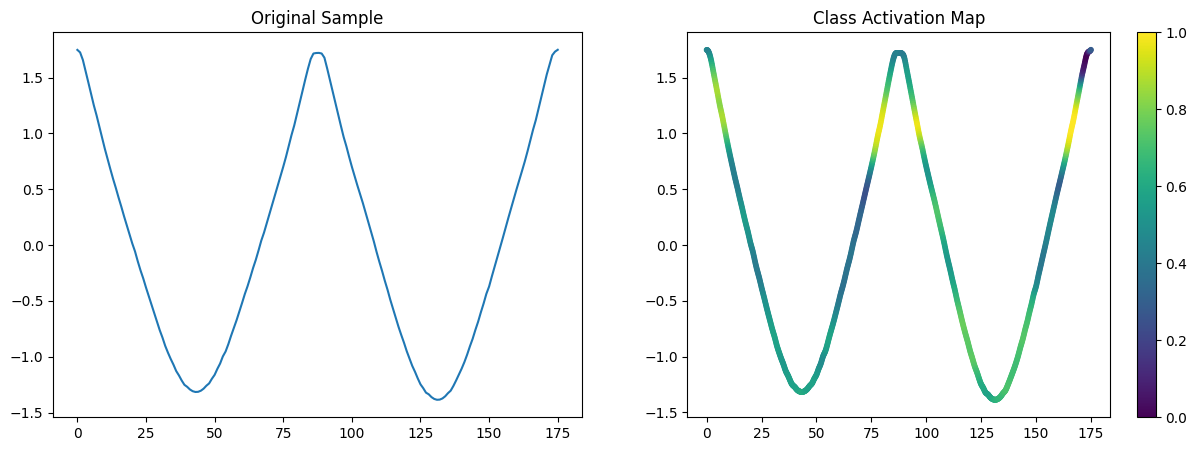

In [97]:
from scipy.interpolate import make_interp_spline
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors


# choose Data
idx = 6

original_sample = X_train[idx]
label = np.argmax(y_train[idx])


# apply CAM 
cam = class_activation_map(model, original_sample, label)


# apply attention 
Xnew = np.linspace(np.arange(len(original_sample)).min(), np.arange(len(original_sample)).max(), 1000)
gfg = make_interp_spline(np.arange(len(original_sample)), original_sample, k=3)
gfg2 = make_interp_spline(np.arange(len(original_sample)), cam, k=3)
y_new = gfg(Xnew)
cam_new = gfg2(Xnew)

colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]
segs = np.zeros((50, 100, 2))

line_segments = LineCollection(segs, linewidths=(0.5, 1, 1.5, 2),
                               colors=colors, linestyle='solid')

fig , axs = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(15)

fig.colorbar(line_segments)

axs[0].set_title("Original Sample")
axs[0].plot(original_sample)

axs[1].set_title("Class Activation Map")
axs[1].scatter(Xnew, y_new, c = cam_new, s = 10)
plt.show()